### Taihua Li | CSC 478 | Homework 3 | 5/14/16

In [1]:
cd "/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 3/communities"

/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 3/communities


#### 1. Linear Regression [Dataset: communities.zip]
#### For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore mosre systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.
#### Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

#### a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dat = pd.read_csv("communities.csv",na_values=["?"])

In [4]:
dat.head()

state        communityname  population  householdsize  racepctblack  \
0      8         Lakewoodcity        0.19           0.33          0.02   
1     53          Tukwilacity        0.00           0.16          0.12   
2     24         Aberdeentown        0.00           0.42          0.49   
3     34  Willingborotownship        0.04           0.77          1.00   
4     42    Bethlehemtownship        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
0          0.90          0.12         0.17         0.34         0.47   
1          0.74          0.45         0.07         0.26         0.59   
2          0.56          0.17         0.04         0.39         0.47   
3          0.08          0.12         0.10         0.51         0.50   
4          0.95          0.09         0.05         0.38         0.38   

          ...           NumStreet  PctForeignBorn  PctBornSameState  \
0         ...                   0            0.12              0.42   
1         ...                   0            0.21              0.50   
2         ...                   0            0.14              0.49   
3         ...                   0            0.19              0.30   
4         ...                   0            0.11              0.72   

   PctSameHouse85  PctSameCity85  PctSameState85  LandArea  PopDens  \
0            0.50           0.51            0.64      0.12     0.26   
1            0.34           0.60            0.52      0.02     0.12   
2            0.54           0.67            0.56      0.01     0.21   
3            0.73           0.64            0.65      0.02     0.39   
4            0.64           0.61            0.53      0.04     0.09   

   PctUsePubTrans  ViolentCrimesPerPop  
0            0.20                 0.20  
1            0.45                 0.67  
2            0.02                 0.43  
3            0.28                 0.12  
4            0.02                 0.03  

[5 rows x 100 columns]

In [5]:
dat.describe(include="all")

state     communityname   population  householdsize  \
count   1994.000000              1994  1994.000000    1994.000000   
unique          NaN              1828          NaN            NaN   
top             NaN  Jacksonvillecity          NaN            NaN   
freq            NaN                 5          NaN            NaN   
mean      28.683551               NaN     0.057593       0.463395   
std       16.397553               NaN     0.126906       0.163717   
min        1.000000               NaN     0.000000       0.000000   
25%       12.000000               NaN     0.010000       0.350000   
50%       34.000000               NaN     0.020000       0.440000   
75%       42.000000               NaN     0.050000       0.540000   
max       56.000000               NaN     1.000000       1.000000   

        racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
count    1994.000000   1994.000000   1994.000000  1994.000000  1994.000000   
unique           NaN           NaN           NaN          NaN          NaN   
top              NaN           NaN           NaN          NaN          NaN   
freq             NaN           NaN           NaN          NaN          NaN   
mean        0.179629      0.753716      0.153681     0.144022     0.424218   
std         0.253442      0.244039      0.208877     0.232492     0.155196   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.020000      0.630000      0.040000     0.010000     0.340000   
50%         0.060000      0.850000      0.070000     0.040000     0.400000   
75%         0.230000      0.940000      0.170000     0.160000     0.470000   
max         1.000000      1.000000      1.000000     1.000000     1.000000   

        agePct12t29         ...             NumStreet  PctForeignBorn  \
count   1994.000000         ...           1994.000000     1994.000000   
unique          NaN         ...                   NaN             NaN   
top             NaN         ...                   NaN             NaN   
freq            NaN         ...                   NaN             NaN   
mean       0.493867         ...              0.022778        0.215552   
std        0.143564         ...              0.100400        0.231134   
min        0.000000         ...              0.000000        0.000000   
25%        0.410000         ...              0.000000        0.060000   
50%        0.480000         ...              0.000000        0.130000   
75%        0.540000         ...              0.000000        0.280000   
max        1.000000         ...              1.000000        1.000000   

        PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
count        1994.000000     1994.000000    1994.000000     1994.000000   
unique               NaN             NaN            NaN             NaN   
top                  NaN             NaN            NaN             NaN   
freq                 NaN             NaN            NaN             NaN   
mean            0.608892        0.535050       0.626424        0.651530   
std             0.204329        0.181352       0.200521        0.198221   
min             0.000000        0.000000       0.000000        0.000000   
25%             0.470000        0.420000       0.520000        0.560000   
50%             0.630000        0.540000       0.670000        0.700000   
75%             0.777500        0.660000       0.770000        0.790000   
max             1.000000        1.000000       1.000000        1.000000   

           LandArea      PopDens  PctUsePubTrans  ViolentCrimesPerPop  
count   1994.000000  1994.000000     1994.000000          1994.000000  
unique          NaN          NaN             NaN                  NaN  
top             NaN          NaN             NaN                  NaN  
freq            NaN          NaN             NaN                  NaN  
mean       0.065231     0.232854        0.161685             0.237979  
std        0.109459     0.203092      

In [6]:
missing = pd.DataFrame(dat.isnull().sum(0))
missing[missing[0]>0]

0
OtherPerCap  1

In [7]:
dat['OtherPerCap'].head(5)

0    0.36
1    0.22
2    0.28
3    0.36
4    0.51
Name: OtherPerCap, dtype: float64

##### As shown above, column, OtherPerCap has one missing value and since it's a column with numerical values, we can fill in the missing value with the column mean.

In [8]:
OtherPerCapMean = dat.OtherPerCap.mean()
dat.OtherPerCap.fillna(OtherPerCapMean, axis=0, inplace=True)
dat.OtherPerCap.isnull().values.any()

False

##### As shown above, the missing value has been filled with the column mean. Since the dataset is already normalized, there is no other preprocessing required. Following is to separate the labels from the dataset.

In [9]:
target = dat['ViolentCrimesPerPop']
dat = dat.drop('ViolentCrimesPerPop', axis=1)
dat = dat.drop('communityname', axis=1)
dat = dat.drop('state', axis=1)

In [10]:
pd.set_option('display.max_rows', dat.describe().shape[1], 'display.max_columns', dat.describe().shape[0])
dat.describe(include="all").T

count      mean       std  min     25%    50%     75%  \
population              1994  0.057593  0.126906    0  0.0100  0.020  0.0500   
householdsize           1994  0.463395  0.163717    0  0.3500  0.440  0.5400   
racepctblack            1994  0.179629  0.253442    0  0.0200  0.060  0.2300   
racePctWhite            1994  0.753716  0.244039    0  0.6300  0.850  0.9400   
racePctAsian            1994  0.153681  0.208877    0  0.0400  0.070  0.1700   
racePctHisp             1994  0.144022  0.232492    0  0.0100  0.040  0.1600   
agePct12t21             1994  0.424218  0.155196    0  0.3400  0.400  0.4700   
agePct12t29             1994  0.493867  0.143564    0  0.4100  0.480  0.5400   
agePct16t24             1994  0.336264  0.166505    0  0.2500  0.290  0.3600   
agePct65up              1994  0.423164  0.179185    0  0.3000  0.420  0.5300   
numbUrban               1994  0.064072  0.128256    0  0.0000  0.030  0.0700   
pctUrban                1994  0.696269  0.444811    0  0.0000  1.000  1.0000   
medIncome               1994  0.361123  0.209362    0  0.2000  0.320  0.4900   
pctWWage                1994  0.558154  0.182913    0  0.4400  0.560  0.6900   
pctWFarmSelf            1994  0.291570  0.204108    0  0.1600  0.230  0.3700   
pctWInvInc              1994  0.495687  0.178071    0  0.3700  0.480  0.6200   
pctWSocSec              1994  0.471133  0.173619    0  0.3500  0.475  0.5800   
pctWPubAsst             1994  0.317778  0.222137    0  0.1425  0.260  0.4400   
pctWRetire              1994  0.479248  0.167564    0  0.3600  0.470  0.5800   
medFamInc               1994  0.375677  0.198257    0  0.2300  0.330  0.4800   
perCapInc               1994  0.350251  0.191109    0  0.2200  0.300  0.4300   
whitePerCap             1994  0.368049  0.186804    0  0.2400  0.320  0.4400   
blackPerCap             1994  0.291098  0.171593    0  0.1725  0.250  0.3800   
indianPerCap            1994  0.203506  0.164775    0  0.1100  0.170  0.2500   
AsianPerCap             1994  0.322357  0.195411    0  0.1900  0.280  0.4000   
OtherPerCap             1994  0.284742  0.190960    0  0.1700  0.250  0.3600   
HispPerCap              1994  0.386279  0.183081    0  0.2600  0.345  0.4800   
NumUnderPov             1994  0.055507  0.127941    0  0.0100  0.020  0.0500   
PctPopUnderPov          1994  0.303024  0.228474    0  0.1100  0.250  0.4500   
PctLess9thGrade         1994  0.315807  0.213360    0  0.1600  0.270  0.4200   
PctNotHSGrad            1994  0.383330  0.202508    0  0.2300  0.360  0.5100   
PctBSorMore             1994  0.361675  0.209193    0  0.2100  0.310  0.4600   
PctUnemployed           1994  0.363531  0.202171    0  0.2200  0.320  0.4800   
PctEmploy               1994  0.501073  0.174036    0  0.3800  0.510  0.6275   
PctEmplManu             1994  0.396384  0.202386    0  0.2500  0.370  0.5200   
PctEmplProfServ         1994  0.440597  0.175457    0  0.3200  0.410  0.5300   
MalePctDivorce          1994  0.461244  0.182460    0  0.3300  0.470  0.5900   
MalePctNevMarr          1994  0.434453  0.175437    0  0.3100  0.400  0.5000   
FemalePctDiv            1994  0.487568  0.175170    0  0.3600  0.500  0.6200   
TotalPctDiv             1994  0.494273  0.183607    0  0.3600  0.500  0.6300   
PersPerFam              1994  0.487748  0.154594    0  0.4000  0.470  0.5600   
PctFam2Par              1994  0.610918  0.201976    0  0.4900  0.630  0.7600   
PctKids2Par             1994  0.620657  0.206353    0  0.4900  0.640  0.7800   
PctYoungKids2Par        1994  0.664032  0.218749    0  0.5300  0.700  0.8400   
PctTeen2Par             1994  0.582884  0.191507    0  0.4800  0.610  0.7200   
PctWorkMomYoungKids     1994  0.501449  0.168612    0  0.3900  0.510  0.6200   
PctWorkMom              1994  0.526690  0.175241    0  0.4200  0.540  0.6500   
NumIlleg                1994  0.036294  0.108671    0  0.0000  0.010  0.0200   
PctIlleg                1994  0.249995  0.229946    0  0.0900  0.170  0.3200   
NumImmig               

In [11]:
target.describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [12]:
dat.shape

(1994, 97)

#### b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation using the learned model and compare the final RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [13]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [14]:
from numpy import *
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [15]:
X = np.array(dat)
y = np.array(target)

In [16]:
X = np.array([np.concatenate((v,[1])) for v in X])
y = np.array(y)

In [17]:
print X 
print y[:10]

[[ 0.19  0.33  0.02 ...,  0.26  0.2   1.  ]
 [ 0.    0.16  0.12 ...,  0.12  0.45  1.  ]
 [ 0.    0.42  0.49 ...,  0.21  0.02  1.  ]
 ..., 
 [ 0.16  0.37  0.25 ...,  0.32  0.18  1.  ]
 [ 0.08  0.51  0.06 ...,  0.38  0.33  1.  ]
 [ 0.2   0.78  0.14 ...,  0.3   0.05  1.  ]]
[ 0.2   0.67  0.43  0.12  0.03  0.14  0.03  0.55  0.53  0.15]


In [18]:
w = standRegres(X,y)
print "The coefficients are"
print w.T

The coefficients are
[[  1.31108068e-01  -3.14114977e-02   2.09909670e-01  -4.05351612e-02
   -1.38892919e-02   5.89726825e-02   1.23399025e-01  -2.22621600e-01
   -1.47500199e-01   5.01635477e-02  -2.42413829e-01   4.64024392e-02
   -1.96945615e-01  -2.06117500e-01   4.65935490e-02  -1.77212915e-01
    6.30148504e-02   1.14942190e-02  -9.08951848e-02   2.74640044e-01
    1.01752476e-01  -3.31517562e-01  -2.91799268e-02  -3.54483393e-02
    2.26173855e-02   4.30950137e-02   3.44408548e-02   1.28412458e-01
   -1.91293360e-01  -1.00769002e-01   6.46856092e-02   1.06062117e-01
    2.44126005e-06   2.34984611e-01  -3.75705330e-02  -7.74957660e-03
    4.66779619e-01   2.26295907e-01   1.74621953e-01  -5.75206227e-01
   -1.41954207e-01   5.68782538e-02  -3.51066745e-01  -3.49493414e-02
    4.63705979e-04   5.57016681e-02  -1.82238360e-01  -1.54646442e-01
    1.26172899e-01  -1.44320569e-01   2.39071713e-02   3.33390229e-02
   -7.42297409e-02   3.59876412e-02  -3.31691535e-02  -2.18174916e-01

In [19]:
xMat=np.mat(X)
yMat=np.mat(y)
yHat = xMat*w
yHatT = np.array(yHat).T

In [20]:
# compute RMSE
err = abs(yHatT - yMat)
print err

[[ 0.03448162  0.37937027  0.04632201 ...,  0.17142767  0.02117355
   0.10673053]]


In [21]:
sum_1 = sum(err)
print sum_1

181.369805675


In [22]:
total_error = np.dot(err, err.T)
print total_error

[[ 33.12538681]]


In [23]:
rmse = np.sqrt(total_error/len(yHat))
print "The RMSE is %0.5f" % rmse

The RMSE is 0.12889


##### 10-fold cross-validation

In [24]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
from sklearn.cross_validation import KFold
kf = KFold(len(x_train), n_folds=10)
sse_cv = 0
for train,test in kf:
    w_cv = standRegres(x_train[train],y_train[train]) 
    yHat_cv = np.array(np.dot(x_train[test],w_cv))[:,0] 
    e_cv = yHat_cv-y_train[test] 
    sse_cv += np.dot(e_cv,e_cv)
    
rmse_cv = np.sqrt(sse_cv/len(y_train))
print '10-fold cross validation RMSE: %0.5f' % rmse_cv

10-fold cross validation RMSE: 0.13563


##### Plot the correlation between predicted and actual target attribute values

In [26]:
corrcoef(yHatT, yMat)

array([[ 1.        ,  0.83294957],
       [ 0.83294957,  1.        ]])

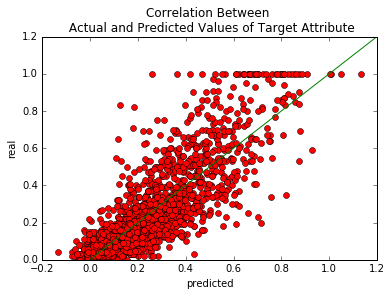

In [27]:
plt.plot(yHatT, yMat,'ro')
plt.plot([0,1.2],[0,1.2], 'g-')
plt.title('Correlation Between \n Actual and Predicted Values of Target Attribute')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

##### As shown above, these two variables are highly correlated and its correlation coefficient is 0.8338.

#### c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function to takes as input the training data and target attribute, the model, and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. Once, you have determined the best set of features, run the model with that feature subset on the set-aside test data.  [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [28]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import cross_validation

In [29]:
X_pd = dat
X = np.array([np.concatenate((v,[1])) for v in np.array(dat)])
y = np.array(target).T

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

##### Determine the best percentile

In [31]:
linreg = LinearRegression()

1 0.112874011634
6 0.0994326847568
11 0.0990051051913
16 0.0990905907953
21 0.0975068622131
26 0.0953491504359
31 0.0949219464329
36 0.09474955355
41 0.0943537042886
46 0.0946644176057
51 0.0950510935611
56 0.095425738239
61 0.0957448325477
66 0.0956304581436
71 0.0958313222977
76 0.0951684772345
81 0.0954808934779
86 0.0951636854361
91 0.0953146310011
96 0.0953334504738
Optimal percentile of features:41 

Optimal number of features:39 



/Users/TaihuaLi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/TaihuaLi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


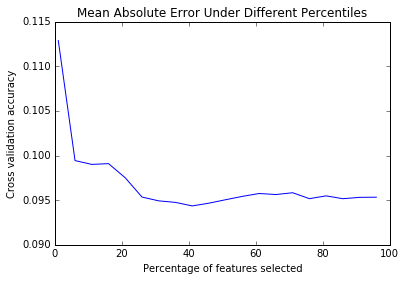

In [32]:
from sklearn import cross_validation

percentiles = range(1,100,5)
results=[]
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, X_train_fs, y_train, scoring='mean_absolute_error', cv=5))
    print i, scores.mean()
    results=np.append(results, scores.mean())

optimal_percentil = np.where(results == results.min())[0]
print "Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n"
optimal_num_features = int(floor(percentiles[optimal_percentil]*len(X_pd.columns)/100))
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.title("Mean Absolute Error Under Different Percentiles")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

##### Here is the list of selected features and their corresponding weights with 41 percentile, as suggested above

In [33]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
X_train_fs = fs.fit_transform(X_train, y_train)

In [34]:
for i in range(len(X_pd.columns.values)):
    if fs.get_support()[i]:
        print X_pd.columns.values[i],'\t\t', fs.scores_[i] 

population 		256.032354737
racepctblack 		1074.88950927
racePctWhite 		1412.50781239
numbUrban 		247.776138548
medIncome 		341.632537523
pctWWage 		161.570750942
pctWInvInc 		756.014972331
pctWPubAsst 		784.570640809
medFamInc 		366.900421844
perCapInc 		214.993157991
NumUnderPov 		400.307856891
PctPopUnderPov 		578.817365214
PctLess9thGrade 		319.218108102
PctNotHSGrad 		472.196207869
PctBSorMore 		173.366843184
PctUnemployed 		533.913152199
PctEmploy 		190.465262464
MalePctDivorce 		602.774893582
FemalePctDiv 		704.772739005
TotalPctDiv 		693.137830382
PctFam2Par 		1657.865017
PctKids2Par 		1972.80406387
PctYoungKids2Par 		1342.17361379
PctTeen2Par 		1299.53510584
NumIlleg 		431.635560269
PctIlleg 		1936.12087378
PctLargHouseFam 		241.23381636
PctPersOwnOccup 		630.760339374
PctPersDenseHous 		375.645901876
PctHousLess3BR 		487.961680842
MedNumBR 		242.066429948
HousVacant 		339.968618162
PctHousOccup 		173.739417017
PctHousOwnOcc 		478.530429718
PctVacantBoarded 		507.636408542
PctH

##### Mean absolute error (MAE) on the testing data

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
X_train_fs = fs.fit_transform(X_train, y_train)
linreg = LinearRegression()
linreg.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
p  = linreg.predict(X_test_fs)
MAE = mean_squared_error(y_test, p)
print 'Mean absolute Error (MAE) of the testing data is %0.5f' % MAE

Mean absolute Error (MAE) of the testing data is 0.02115


#### d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values, the model to be trained, and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [37]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error

In [38]:
def calc_params(X, y, param_name, param_values, model, name, K=5):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
            train_scores[i] = np.mean(k_train_scores)
            test_scores[i] = np.mean(k_test_scores)
    
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.title('Mean Absolute Errors vs '+ param_name +' in '+ name +' model')

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [39]:
alpha = np.linspace(0.0001, 200,500)
alpha = np.array([float(e) for e in alpha])
param_values = alpha

In [40]:
ridreg = Ridge()
lasreg = Lasso()

##### Ridge & Lasso Regression

In [41]:
def get_param(func, model_name):
    train_scores, test_scores = calc_params(X_train, y_train, "alpha", param_values, func, model_name, K=5)
    min_err_score_idx = np.where(test_scores == test_scores.min())
    min_err_score_alpha = param_values[min_err_score_idx]
    print 'The minimum Mean Absolute Error (MAE) on training data:', test_scores[min_err_score_idx][0],'with alpha:', min_err_score_alpha[0]

The minimum Mean Absolute Error (MAE) on training data: 0.0957041204147 with alpha: 3.20651122244


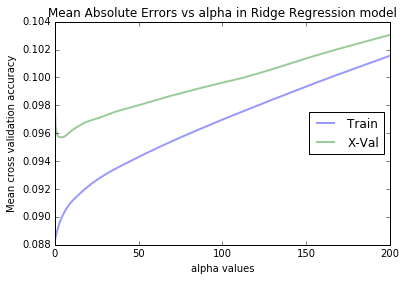

In [42]:
get_param(ridreg, "Ridge Regression")

In [43]:
ridreg = Ridge(fit_intercept=True, alpha=117.034109619)
ridreg.fit(X_train, y_train)    
p = ridreg.predict(X_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))

print 'RMSE on test data: %0.5f' % rmse, 'using apha = 117.034109619 as suggested above'
print 'Mean absolute error on test data: %0.5f' % MAE,'using apha = 117.034109619 as suggested above'

RMSE on test data: 0.14977 using apha = 117.034109619 as suggested above
Mean absolute error on test data: 0.02243 using apha = 117.034109619 as suggested above


The minimum Mean Absolute Error (MAE) on training data: 0.0969693440061 with alpha: 0.0001


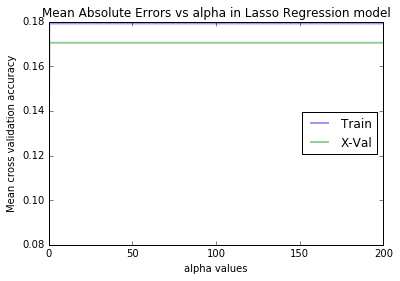

In [44]:
get_param(lasreg, "Lasso Regression")

In [45]:
lasreg = Lasso(fit_intercept=True, alpha=0.0001)
lasreg.fit(X_train, y_train)    
p = lasreg.predict(X_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))
print 'Mean absolute error on test data: %0.5f' % MAE,'using apha = 0.0001 as suggested above'
print 'RMSE on test data: %0.5f' % rmse, 'using apha = 0.0001 as suggested above'

Mean absolute error on test data: 0.02061 using apha = 0.0001 as suggested above
RMSE on test data: 0.14357 using apha = 0.0001 as suggested above


##### In part D, we can observe that the mean absolute error in Lasso Regression gets bigger as the alpha increases. In other words lower alphas are best for this type of regression. For Ridge Regression, the mean absolute error decreases till alpha equals to 0.6062 and the incrases as alpha increases. Therefore, for Ridge Regression, the best model is when alpha is between 0 and 1.

##### As shown above, for Ridge Regression, the best alpha value, chosen between 0.0001 and 1 is 0.6062 and for Lasso Regression, the best alpha value is 0.0001. For both regressions, with the alpha levels chosen, the Mean Absolute Errors are really similar with the MAE of Ridge regression being slightly lower than that of Lasso Regression. Since for Lassso Regression, the penalty is 0.0001, which is really small, it indicates that we need a larger number of features to construct the regression model since l1 favors a small number of non-zero coefficients with small absolute values. In conclusion, Ridge Regression will be a better model in this case.

#### 3) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

In [47]:
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=33)

In [48]:
sgdreg = SGDRegressor()

In [49]:
parameters = {'penalty': ['l1', 'l2'],'alpha': np.linspace(0.0001, 100, 400)}
gs = GridSearchCV(sgdreg, parameters, verbose=2, cv=5)

In [50]:
gs.fit(X_norm, y)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ........

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.3s


[CV] ........................ penalty=l2, alpha=1.25323157895 -   0.0s
[CV] penalty=l2, alpha=1.25323157895 .................................
[CV] ........................ penalty=l2, alpha=1.25323157895 -   0.0s
[CV] penalty=l1, alpha=1.50385789474 .................................
[CV] ........................ penalty=l1, alpha=1.50385789474 -   0.0s
[CV] penalty=l1, alpha=1.50385789474 .................................
[CV] ........................ penalty=l1, alpha=1.50385789474 -   0.0s
[CV] penalty=l1, alpha=1.50385789474 .................................
[CV] ........................ penalty=l1, alpha=1.50385789474 -   0.0s
[CV] penalty=l1, alpha=1.50385789474 .................................
[CV] ........................ penalty=l1, alpha=1.50385789474 -   0.0s
[CV] penalty=l1, alpha=1.50385789474 .................................
[CV] ........................ penalty=l1, alpha=1.50385789474 -   0.0s
[CV] penalty=l2, alpha=1.50385789474 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:    1.2s


[CV] penalty=l1, alpha=4.26074736842 .................................
[CV] ........................ penalty=l1, alpha=4.26074736842 -   0.0s
[CV] penalty=l1, alpha=4.26074736842 .................................
[CV] ........................ penalty=l1, alpha=4.26074736842 -   0.0s
[CV] penalty=l1, alpha=4.26074736842 .................................
[CV] ........................ penalty=l1, alpha=4.26074736842 -   0.0s
[CV] penalty=l1, alpha=4.26074736842 .................................
[CV] ........................ penalty=l1, alpha=4.26074736842 -   0.0s
[CV] penalty=l2, alpha=4.26074736842 .................................
[CV] ........................ penalty=l2, alpha=4.26074736842 -   0.0s
[CV] penalty=l2, alpha=4.26074736842 .................................
[CV] ........................ penalty=l2, alpha=4.26074736842 -   0.0s
[CV] penalty=l2, alpha=4.26074736842 .................................
[CV] ........................ penalty=l2, alpha=4.26074736842 -   0.0s
[CV] p

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:    2.7s


[CV] ........................ penalty=l1, alpha=9.77452631579 -   0.0s
[CV] penalty=l1, alpha=9.77452631579 .................................
[CV] ........................ penalty=l1, alpha=9.77452631579 -   0.0s
[CV] penalty=l1, alpha=9.77452631579 .................................
[CV] ........................ penalty=l1, alpha=9.77452631579 -   0.0s
[CV] penalty=l2, alpha=9.77452631579 .................................
[CV] ........................ penalty=l2, alpha=9.77452631579 -   0.0s
[CV] penalty=l2, alpha=9.77452631579 .................................
[CV] ........................ penalty=l2, alpha=9.77452631579 -   0.0s
[CV] penalty=l2, alpha=9.77452631579 .................................
[CV] ........................ penalty=l2, alpha=9.77452631579 -   0.0s
[CV] penalty=l2, alpha=9.77452631579 .................................
[CV] ........................ penalty=l2, alpha=9.77452631579 -   0.0s
[CV] penalty=l2, alpha=9.77452631579 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed:    4.8s


[CV] ........................ penalty=l1, alpha=16.2908105263 -   0.0s
[CV] penalty=l1, alpha=16.2908105263 .................................
[CV] ........................ penalty=l1, alpha=16.2908105263 -   0.0s
[CV] penalty=l1, alpha=16.2908105263 .................................
[CV] ........................ penalty=l1, alpha=16.2908105263 -   0.0s
[CV] penalty=l1, alpha=16.2908105263 .................................
[CV] ........................ penalty=l1, alpha=16.2908105263 -   0.0s
[CV] penalty=l2, alpha=16.2908105263 .................................
[CV] ........................ penalty=l2, alpha=16.2908105263 -   0.0s
[CV] penalty=l2, alpha=16.2908105263 .................................
[CV] ........................ penalty=l2, alpha=16.2908105263 -   0.0s
[CV] penalty=l2, alpha=16.2908105263 .................................
[CV] ........................ penalty=l2, alpha=16.2908105263 -   0.0s
[CV] penalty=l2, alpha=16.2908105263 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1012 tasks       | elapsed:    7.4s


[CV] ........................ penalty=l1, alpha=25.5639842105 -   0.0s
[CV] penalty=l1, alpha=25.5639842105 .................................
[CV] ........................ penalty=l1, alpha=25.5639842105 -   0.0s
[CV] penalty=l1, alpha=25.5639842105 .................................
[CV] ........................ penalty=l1, alpha=25.5639842105 -   0.0s
[CV] penalty=l2, alpha=25.5639842105 .................................
[CV] ........................ penalty=l2, alpha=25.5639842105 -   0.0s
[CV] penalty=l2, alpha=25.5639842105 .................................
[CV] ........................ penalty=l2, alpha=25.5639842105 -   0.0s
[CV] penalty=l2, alpha=25.5639842105 .................................
[CV] ........................ penalty=l2, alpha=25.5639842105 -   0.0s
[CV] penalty=l2, alpha=25.5639842105 .................................
[CV] ........................ penalty=l2, alpha=25.5639842105 -   0.0s
[CV] penalty=l2, alpha=25.5639842105 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed:   10.7s


[CV] ........................ penalty=l1, alpha=37.0927947368 -   0.0s
[CV] penalty=l1, alpha=37.0927947368 .................................
[CV] ........................ penalty=l1, alpha=37.0927947368 -   0.0s
[CV] penalty=l1, alpha=37.0927947368 .................................
[CV] ........................ penalty=l1, alpha=37.0927947368 -   0.0s
[CV] penalty=l1, alpha=37.0927947368 .................................
[CV] ........................ penalty=l1, alpha=37.0927947368 -   0.0s
[CV] penalty=l1, alpha=37.0927947368 .................................
[CV] ........................ penalty=l1, alpha=37.0927947368 -   0.0s
[CV] penalty=l2, alpha=37.0927947368 .................................
[CV] ........................ penalty=l2, alpha=37.0927947368 -   0.0s
[CV] penalty=l2, alpha=37.0927947368 .................................
[CV] ........................ penalty=l2, alpha=37.0927947368 -   0.0s
[CV] penalty=l2, alpha=37.0927947368 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1984 tasks       | elapsed:   14.5s


[CV] ........................ penalty=l1, alpha=49.8747368421 -   0.0s
[CV] penalty=l1, alpha=49.8747368421 .................................
[CV] ........................ penalty=l1, alpha=49.8747368421 -   0.0s
[CV] penalty=l2, alpha=49.8747368421 .................................
[CV] ........................ penalty=l2, alpha=49.8747368421 -   0.0s
[CV] penalty=l2, alpha=49.8747368421 .................................
[CV] ........................ penalty=l2, alpha=49.8747368421 -   0.0s
[CV] penalty=l2, alpha=49.8747368421 .................................
[CV] ........................ penalty=l2, alpha=49.8747368421 -   0.0s
[CV] penalty=l2, alpha=49.8747368421 .................................
[CV] ........................ penalty=l2, alpha=49.8747368421 -   0.0s
[CV] penalty=l2, alpha=49.8747368421 .................................
[CV] ........................ penalty=l2, alpha=49.8747368421 -   0.0s
[CV] penalty=l1, alpha=50.1253631579 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 2591 tasks       | elapsed:   19.0s


[CV] ........................ penalty=l2, alpha=65.1629421053 -   0.0s
[CV] penalty=l2, alpha=65.1629421053 .................................
[CV] ........................ penalty=l2, alpha=65.1629421053 -   0.0s
[CV] penalty=l2, alpha=65.1629421053 .................................
[CV] ........................ penalty=l2, alpha=65.1629421053 -   0.0s
[CV] penalty=l2, alpha=65.1629421053 .................................
[CV] ........................ penalty=l2, alpha=65.1629421053 -   0.0s
[CV] penalty=l2, alpha=65.1629421053 .................................
[CV] ........................ penalty=l2, alpha=65.1629421053 -   0.0s
[CV] penalty=l1, alpha=65.4135684211 .................................
[CV] ........................ penalty=l1, alpha=65.4135684211 -   0.0s
[CV] penalty=l1, alpha=65.4135684211 .................................
[CV] ........................ penalty=l1, alpha=65.4135684211 -   0.0s
[CV] penalty=l1, alpha=65.4135684211 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 3280 tasks       | elapsed:   24.0s


[CV] ........................ penalty=l2, alpha=82.4561578947 -   0.0s
[CV] penalty=l1, alpha=82.7067842105 .................................
[CV] ........................ penalty=l1, alpha=82.7067842105 -   0.0s
[CV] penalty=l1, alpha=82.7067842105 .................................
[CV] ........................ penalty=l1, alpha=82.7067842105 -   0.0s
[CV] penalty=l1, alpha=82.7067842105 .................................
[CV] ........................ penalty=l1, alpha=82.7067842105 -   0.0s
[CV] penalty=l1, alpha=82.7067842105 .................................
[CV] ........................ penalty=l1, alpha=82.7067842105 -   0.0s
[CV] penalty=l1, alpha=82.7067842105 .................................
[CV] ........................ penalty=l1, alpha=82.7067842105 -   0.0s
[CV] penalty=l2, alpha=82.7067842105 .................................
[CV] ........................ penalty=l2, alpha=82.7067842105 -   0.0s
[CV] penalty=l2, alpha=82.7067842105 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   29.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([  1.00000e-04,   2.50726e-01, ...,   9.97494e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [51]:
for (k, f) in gs.best_params_.items():
    sgdreg.set_params(**{k:f})
    print "The best", k, "found", f

The best penalty found l2
The best alpha found 0.501352631579


In [52]:
sgdreg = SGDRegressor(penalty='l1', alpha=0.0001, n_iter=200)
sgdreg.fit(X_norm, y)
p = sgdreg.predict(X_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))

print 'RMSE on test data: %0.5f' % rmse, 'with penalty equals to "l1" and alpha equals to 0.0001'
print 'MAE on test set: %0.5f' % MAE, "with penalty equals to 'l1' and alpha equals to 0.0001"

RMSE on test data: 0.13713 with penalty equals to "l1" and alpha equals to 0.0001
MAE on test set: 0.01881 with penalty equals to 'l1' and alpha equals to 0.0001


##### Elastic Net Model

In [53]:
sgdreg = SGDRegressor()

In [54]:
parameters = {'penalty': ['elasticnet'],'l1_ratio': np.linspace(0.0001,0.9999, 400), 'alpha': np.linspace(0.0001,20,10)}
gs = GridSearchCV(sgdreg, parameters, verbose=2, cv=5)

In [55]:
gs.fit(X_norm, y)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 ...............
[CV] ...... penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 ...............
[CV] ...... penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 ...............
[CV] ...... penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 ...............
[CV] ...... penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 ...............
[CV] ...... penalty=elasticnet, alpha=0.0001, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.00260576441103 .....
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.00260576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.00260576441103 .....
[CV]  p

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.3s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0226518796992 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0276634085213 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0276634085213 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.027663

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:    1.3s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0852959899749 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.0852959899749 ......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.0852959899749 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.087801754386 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.09030751879

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:    3.0s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.185526566416 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.188032330827 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.190538095238 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.190538095238 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.190538095238 

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed:    5.3s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.325849373434 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.328355137845 

[Parallel(n_jobs=1)]: Done 1012 tasks       | elapsed:    8.4s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.513781704261 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.513781704261 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.513781704261 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.513781704261 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.513781704261 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.516287468672 

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed:   12.1s


[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.736794736842 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.739300501253 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.741806265664 .......
[CV]  penalty=elasticnet, alpha=0.0001, l1_ratio=0.741806265664 -   0.0s
[CV] penalty=elasticnet, alpha=0.0001, l1_ratio=0.741806265664 

[Parallel(n_jobs=1)]: Done 1984 tasks       | elapsed:   16.4s


[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 ........
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 ........
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 ........
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 ........
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.0001 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.00260576441103 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.00260576441103 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.00260576441103 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.00260576441103 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, 

[Parallel(n_jobs=1)]: Done 2591 tasks       | elapsed:   22.4s


[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.295780200501 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.295780200501 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.295780200501 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.298285964912 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 3280 tasks       | elapsed:   29.2s


[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.644081453634 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.646587218045 -   0.0s
[CV] penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.649092982456 
[CV]  penalty=elasticnet, alpha=2.22231111111, l1_ratio=0.649092982456 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   36.7s


[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0251576441103 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0251576441103 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.0276634085213 -   0.0s
[

[Parallel(n_jobs=1)]: Done 4900 tasks       | elapsed:   45.2s


[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.456149122807 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.456149122807 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.456149122807 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.458654887218 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 5831 tasks       | elapsed:   54.3s


[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.919715538847 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.922221303258 -   0.0s
[CV] penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.924727067669 
[CV]  penalty=elasticnet, alpha=4.44452222222, l1_ratio=0.924727067669 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 6844 tasks       | elapsed:  1.1min


[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.423574185464 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.426079949875 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.428585714286 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.428585714286 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 7937 tasks       | elapsed:  1.3min


[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.972336591479 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.97484235589 .
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.97484235589 -   0.0s
[CV] penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.97484235589 .
[CV]  penalty=elasticnet, alpha=6.66673333333, l1_ratio=0.97484235589 -   0.0s
[CV] penalty=ela

[Parallel(n_jobs=1)]: Done 9112 tasks       | elapsed:  1.4min


[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.558885463659 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.56139122807 .
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.56139122807 -   0.0s
[CV] penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.56139122807 .
[CV]  penalty=elasticnet, alpha=8.88894444444, l1_ratio=0.56139122807 -   0.0s
[CV] penalty=ela

[Parallel(n_jobs=1)]: Done 10367 tasks       | elapsed:  1.7min


[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.183020802005 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.183020802005 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.183020802005 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.183020802005 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.183020802005 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.185526566416 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 11704 tasks       | elapsed:  1.9min


[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.852059899749 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 .
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 .
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 .
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 .
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 .
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.85456566416 -   0.0s
[CV] penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.857071428571 
[CV]  penalty=elasticnet, alpha=11.1111555556, l1_ratio=0.857071428571 -   0.0s
[CV] penalty=elasti

[Parallel(n_jobs=1)]: Done 13121 tasks       | elapsed:  2.2min


[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.563896992481 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.566402756892 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.566402756892 -   0.0s
[CV] penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.566402756892 
[CV]  penalty=elasticnet, alpha=13.3333666667, l1_ratio=0.566402756892 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 14620 tasks       | elapsed:  2.4min


[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.315826315789 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.315826315789 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.315826315789 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 -   0.0s
[CV] penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 
[CV]  penalty=elasticnet, alpha=15.5555777778, l1_ratio=0.318332080201 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 16199 tasks       | elapsed:  2.7min



[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.105342105263 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.105342105263 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.105342105263 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.105342105263 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.105342105263 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.107847869674 -   0.0s
[CV] penalty=

[Parallel(n_jobs=1)]: Done 17860 tasks       | elapsed:  3.0min


[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.939761654135 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.939761654135 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.939761654135 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 -   0.0s
[CV] penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 
[CV]  penalty=elasticnet, alpha=17.7777888889, l1_ratio=0.942267418546 -   0.0s
[CV] penalty=e

[Parallel(n_jobs=1)]: Done 19601 tasks       | elapsed:  3.3min


[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.811967669173 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 .........
[CV]  penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 -   0.0s
[CV] penalty=elasticnet, alpha=20.0, l1_ratio=0.814473433584 .........
[CV]  

[Parallel(n_jobs=1)]: Done 20000 out of 20000 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['elasticnet'], 'l1_ratio': array([  1.00000e-04,   2.60576e-03, ...,   9.97394e-01,   9.99900e-01]), 'alpha': array([  1.00000e-04,   2.22231e+00,   4.44452e+00,   6.66673e+00,
         8.88894e+00,   1.11112e+01,   1.33334e+01,   1.55556e+01,
         1.77778e+01,   2.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [56]:
for (k, f) in gs.best_params_.items():
    sgdreg.set_params(**{k:f})
    print "The best", k, "found", f

The best penalty found elasticnet
The best alpha found 0.0001
The best l1_ratio found 0.869600250627


In [57]:
sgdreg = SGDRegressor(penalty='elasticnet', alpha=0.0001, n_iter=200, l1_ratio=0.792)
sgdreg.fit(X_norm, y)
p = sgdreg.predict(X_test)
MAE = mean_squared_error(y_test, p)
err = p-y_test # get residual
sse = np.dot(err,err)
rmse = np.sqrt(sse/len(y_test))

print 'RMSE on test data: %0.5f' % rmse, 'with penalty equals to "elasticnet" and l1_ratio equals to 0.792'
print 'MAE on test set: %0.5f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio equals to 0.792"

RMSE on test data: 0.13717 with penalty equals to "elasticnet" and l1_ratio equals to 0.792
MAE on test set: 0.01881 with penalty equals to 'elasticnet' and l1_ratio equals to 0.792


##### Overall, we can see that selecting models by percentile of features produces the worst model in all the experiments as it has the highest mean absolute error. By using the grid search, it makes model selection a lot easier because we do not have to test each model individually. Out of the models produced using grid search, elastic net model is the best option of all models tested, including Ridge and Lasso Regression.

#### 2. Automatic Document Clustering [Dataset: newsgroups5.zip]
#### For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

#### Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

#### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [58]:
cd "/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 3/newsgroups5"

/Users/TaihuaLi/Desktop/DePaul/CSC478 Programming Data Mining Apps/Homework/Homework 3/newsgroups5


In [59]:
def disCosine(x, D):
    D_norm = np.linalg.norm(D)
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
    dists = 1- sims
    return dists

#### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [60]:
import pandas as pd
import numpy as np

In [61]:
terms = np.array(pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t',dtype=str)))

In [62]:
DT = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',',dtype=int).T)

In [63]:
classes = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ',dtype=int,skip_header=1))
classes = classes.drop(0, axis=1)

In [64]:
DT.head(5)

0     1     2     3     ...   9324  9325  9326  9327
0     0     0     0     0  ...      0     0     0     0
1     0     0     0     0  ...      0     0     0     0
2     0     0     0     0  ...      0     0     0     0
3     0     0     0     0  ...      0     0     0     0
4     0     0     0     0  ...      0     0     0     0

[5 rows x 9328 columns]

In [65]:
classes.head(5)

1
0  0
1  1
2  1
3  1
4  2

In [66]:
from sklearn.cross_validation import train_test_split
DT_train, DT_test, class_train, class_test = train_test_split(DT, classes, test_size=0.2, random_state=33)

#### c. As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [67]:
numTerms = DT_train.shape[1]
train_numDocs = DT_train.shape[0]
test_numDocs = DT_test.shape[0]
print numTerms, train_numDocs, test_numDocs

9328 2000 500


In [68]:
TD_train = DT_train.T
TD_test = DT_test.T

In [69]:
DF_train = np.array([(TD_train!=0).sum(1)]).T
print DF_train

[[ 7]
 [ 4]
 [17]
 ..., 
 [ 2]
 [ 1]
 [ 2]]


In [70]:
TrainNMatrix = np.ones(np.shape(TD_train), dtype=float)*train_numDocs
TestNMatrix = np.ones(np.shape(TD_test), dtype=float)*train_numDocs

In [71]:
TrainNMatrix

array([[ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.],
       [ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.],
       [ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.],
       ..., 
       [ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.],
       [ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.],
       [ 2000.,  2000.,  2000., ...,  2000.,  2000.,  2000.]])

In [72]:
TrainIDF = np.log2(np.divide(TrainNMatrix, DF_train), dtype=float)
TestIDF = np.log2(np.divide(TestNMatrix, DF_train), dtype=float)

In [73]:
TrainTFIDF = np.array(TD_train * TrainIDF, dtype=float)
TestTFIDF = np.array(TD_test * TestIDF, dtype=float)

In [74]:
NewDTTrain_TFIDF = TrainTFIDF.T
NewDTTest_TFIDF = TestTFIDF.T

In [75]:
print NewDTTrain_TFIDF.shape
NewDTTrain_TFIDF

(2000, 9328)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [76]:
print NewDTTest_TFIDF.shape
NewDTTest_TFIDF

(500, 9328)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [77]:
NewDTTrain_TFIDF[np.isnan(NewDTTrain_TFIDF)] = 0
NewDTTest_TFIDF[np.isnan(NewDTTest_TFIDF)] = 0
NewDTTrain_TFIDF[NewDTTrain_TFIDF == inf] = 0
NewDTTrain_TFIDF[NewDTTrain_TFIDF == -inf] = 0
NewDTTest_TFIDF[NewDTTest_TFIDF == inf] = 0
NewDTTest_TFIDF[NewDTTest_TFIDF == -inf] = 0

##### Another way to convert the data into TFIDF is using sklearn.feature_extraction.text built-in module

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer
NewDTTrain_TFIDF_2 = TfidfTransformer().fit_transform(DT_train).toarray()
NewDTTest_TFIDF_2 = TfidfTransformer().fit_transform(DT_test).toarray()

#### d. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term, percentage of docs in the cluster in which the terms appear, and the size of the cluster. Sort the terms in decreasing order of the DF percentage. [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [79]:
from numpy import *
import kMeans

In [80]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [81]:
def TopTerms(data, k, NTerms):
    centroids, clusters = kMeans.kMeans(mat(data), k, distMeas=disCosine)
    for i in range(k):
        print 'cluster',i+1,':'
        cluster_DT = data[clusters[:,0]==i]
        print 'cluster',i+1,' size: ', cluster_DT.shape[0]
        cluster_DF = np.array([(cluster_DT.T!=0).sum(1)]).T
        term_doc_pc_cluster = cluster_DF/float(cluster_DT.shape[0])
        term_doc_pc_cluster = map(list, term_doc_pc_cluster)
        term_doc_pc_cluster = [elem[0] for elem in term_doc_pc_cluster]
        cluster_DF = [elem[0] for elem in cluster_DF]
        a=sorted(zip(terms, cluster_DF, term_doc_pc_cluster),key=lambda x:x[2],reverse=True)
        for elem in a[:NTerms]:
            print 'term: ',elem[0]
            print 'cluster DF: ',elem[1]
            print 'percentage of docs in the cluster where the term appears: ',elem[2],'\n'
        print '\n'
    return  centroids, clusters

In [82]:
centroids, clusters = TopTerms(NewDTTrain_TFIDF_2, 5, 3)

cluster 1 :
cluster 1  size:  396
term:  ['subject']
cluster DF:  396
percentage of docs in the cluster where the term appears:  1.0 

term:  ['write']
cluster DF:  247
percentage of docs in the cluster where the term appears:  0.623737373737 

term:  ['on']
cluster DF:  222
percentage of docs in the cluster where the term appears:  0.560606060606 



cluster 2 :
cluster 2  size:  393
term:  ['subject']
cluster DF:  393
percentage of docs in the cluster where the term appears:  1.0 

term:  ['sale']
cluster DF:  225
percentage of docs in the cluster where the term appears:  0.572519083969 

term:  ['email']
cluster DF:  153
percentage of docs in the cluster where the term appears:  0.389312977099 



cluster 3 :
cluster 3  size:  397
term:  ['subject']
cluster DF:  397
percentage of docs in the cluster where the term appears:  1.0 

term:  ['write']
cluster DF:  272
percentage of docs in the cluster where the term appears:  0.685138539043 

term:  ['articl']
cluster DF:  207
percentage

##### Extra Credit

In [83]:
cluster_1 = pd.DataFrame(NewDTTrain_TFIDF[clusters[:,0]==0])
cluster_2 = pd.DataFrame(NewDTTrain_TFIDF[clusters[:,0]==1])
cluster_3 = pd.DataFrame(NewDTTrain_TFIDF[clusters[:,0]==2])
cluster_4 = pd.DataFrame(NewDTTrain_TFIDF[clusters[:,0]==3])
cluster_5 = pd.DataFrame(NewDTTrain_TFIDF[clusters[:,0]==4])

In [84]:
cluster_1.columns = terms.T[0]
cluster_2.columns = terms.T[0]
cluster_3.columns = terms.T[0]
cluster_4.columns = terms.T[0]
cluster_5.columns = terms.T[0]

In [85]:
# sample output
cluster_1.head(5)

aa  aargh  aaron  aaronc ...  zv  zw  zx  zz
0   0      0      0       0 ...   0   0   0   0
1   0      0      0       0 ...   0   0   0   0
2   0      0      0       0 ...   0   0   0   0
3   0      0      0       0 ...   0   0   0   0
4   0      0      0       0 ...   0   0   0   0

[5 rows x 9328 columns]

In [86]:
c1_DF = list(np.array((cluster_1.T!=0).sum(1).T))
c2_DF = list(np.array((cluster_2.T!=0).sum(1).T))
c3_DF = list(np.array((cluster_3.T!=0).sum(1).T))
c4_DF = list(np.array((cluster_4.T!=0).sum(1).T))
c5_DF = list(np.array((cluster_5.T!=0).sum(1).T))

In [87]:
c1_DF[0:5]

[1, 0, 11, 6, 1]

In [88]:
terms_list = list(terms.T[0])

In [89]:
c1_string = ""
c2_string = ""
c3_string = ""
c4_string = ""
c5_string = ""
index = 0
for i in c1_DF:
    for j in range(i):
        c1_string += terms_list[index] + " "
    index += 1

index = 0
for i in c2_DF:
    for j in range(i):
        c2_string += terms_list[index] + " "
    index += 1

index = 0
for i in c3_DF:
    for j in range(i):
        c3_string += terms_list[index] + " "
    index += 1
    
index = 0
for i in c4_DF:
    for j in range(i):
        c4_string += terms_list[index] + " "
    index += 1
    
index = 0
for i in c5_DF:
    for j in range(i):
        c5_string += terms_list[index] + " "
    index += 1

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
c1_wordcloud = WordCloud(background_color='white').generate(c1_string)
c2_wordcloud = WordCloud(background_color='white').generate(c2_string)
c3_wordcloud = WordCloud(background_color='white').generate(c3_string)
c4_wordcloud = WordCloud(background_color='white').generate(c4_string)
c5_wordcloud = WordCloud(background_color='white').generate(c5_string)

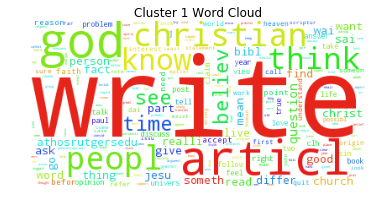

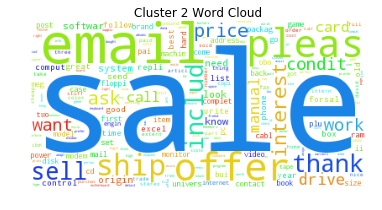

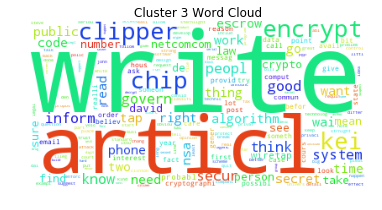

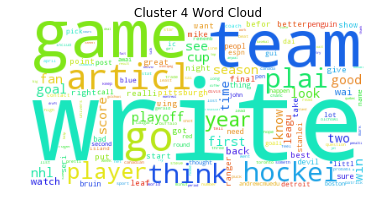

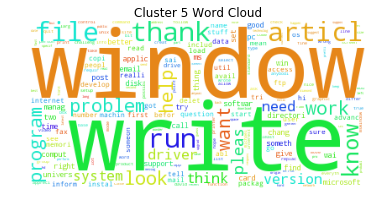

In [91]:
plt.imshow(c1_wordcloud)
plt.axis('off')
plt.title('Cluster 1 Word Cloud')
plt.show()

plt.imshow(c2_wordcloud)
plt.axis('off')
plt.title('Cluster 2 Word Cloud')
plt.show()

plt.imshow(c3_wordcloud)
plt.axis('off')
plt.title('Cluster 3 Word Cloud')
plt.show()

plt.imshow(c4_wordcloud)
plt.axis('off')
plt.title('Cluster 4 Word Cloud')
plt.show()

plt.imshow(c5_wordcloud)
plt.axis('off')
plt.title('Cluster 5 Word Cloud')
plt.show()

#### e. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [92]:
from sklearn.metrics import completeness_score, homogeneity_score
print 'completeness_score: ', completeness_score(np.array(class_train.T)[0],clusters[:,0])
print 'homogeneity_score: ', homogeneity_score(np.array(class_train.T)[0],clusters[:,0])

completeness_score:  0.856312884103
homogeneity_score:  0.856324906501


#### f. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [93]:
records = []
for test_doc in NewDTTest_TFIDF:
    dic = {}
    sim = []
    cluster=1
    for centroid in centroids:
        sim.append(1-disCosine(test_doc, centroid)) 
        dic['Similarity With Cluster '+str(cluster)] = 1 - disCosine(test_doc, centroid)
        cluster+=1
    dic['Cluster Assignment'] = sim.index(max(sim))+1
    records.append(dic)
test_cluster = pd.DataFrame(records,index=range(len(NewDTTest_TFIDF)),columns=['Similarity With Cluster 1','Similarity With Cluster 2',
                                                                             'Similarity With Cluster 3','Similarity With Cluster 4',
                                                                             'Similarity With Cluster 5', 'Cluster Assignment'])
test_cluster.head(10)

Similarity With Cluster 1  Similarity With Cluster 2  \
0                   0.121226                   0.027058   
1                   0.144265                   0.060879   
2                   0.021357                   0.078356   
3                   0.103109                   0.081776   
4                   0.051501                   0.173223   
5                   0.093440                   0.079524   
6                   0.102303                   0.072245   
7                   0.075594                   0.068812   
8                   0.434855                   0.072320   
9                   0.108508                   0.031008   

   Similarity With Cluster 3  Similarity With Cluster 4  \
0                   0.043621                   0.031052   
1                   0.089416                   0.056879   
2                   0.018947                   0.013340   
3                   0.109667                   0.086164   
4                   0.021832                   0.072374   
5                   0.366563                   0.078319   
6                   0.105109                   0.278542   
7                   0.061824                   0.040140   
8                   0.102751                   0.087196   
9                   0.042268                   0.053868   

   Similarity With Cluster 5  Cluster Assignment  
0                   0.032388                   1  
1                   0.056824                   1  
2                   0.012511                   2  
3                   0.245401                   5  
4                   0.027038                   2  
5                   0.091184                   3  
6                   0.081299                   4  
7                   0.050616                   1  
8                   0.084196                   1  
9                   0.042189                   1

In [94]:
test_cluster.to_csv('test_cluster.csv', sep=",")